# A visualization of an astrophysical simulation
There are two files that contain gas density and internal energy from a slice through a cosmological situation. Lets read them in and make a three-color image.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

## Read in the density file
The file is a 512x512 projection of a 512^3 dataset. We can read it using numpy's fromfile() function and reshape it to 512x512 using numpy's reshape().

In [8]:
fname = "density_projection.dat"
d = np.fromfile(fname,dtype=np.float32)
d = np.reshape(d,(512,512))

## Repeat for energy file

In [9]:
fname = "energy_projection.dat"
energy = np.fromfile(fname,dtype=np.float32)
energy = np.reshape(energy,(512,512))

## Lets plot them using the default color map

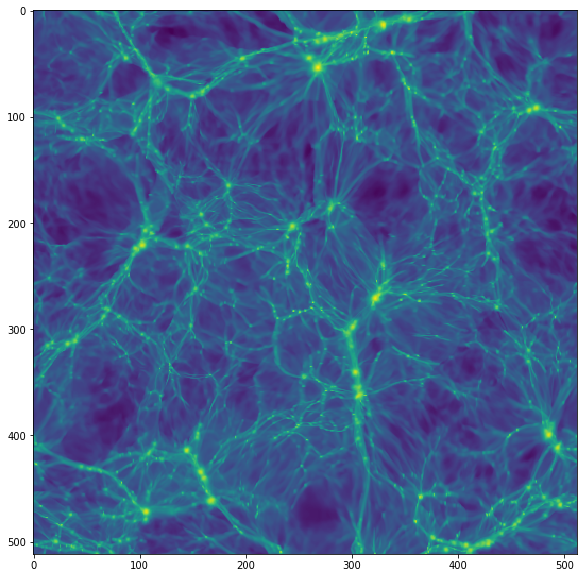

In [11]:
d_log = np.log10(d)
f = plt.figure(figsize=(10,10))
plt.imshow(d_log);

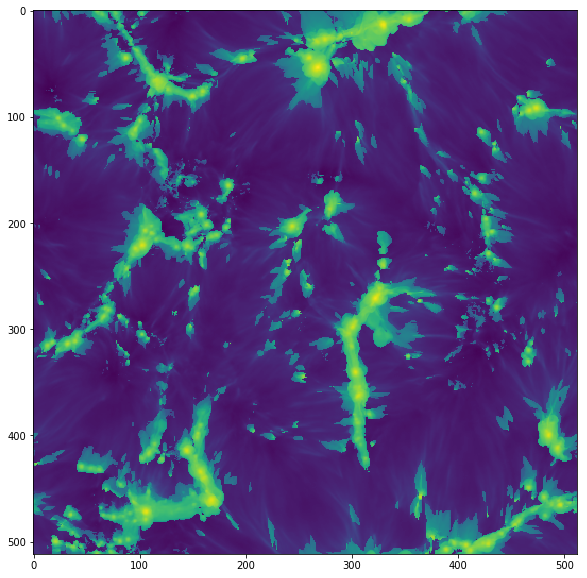

In [12]:
e_log = np.log10(energy)
f = plt.figure(figsize=(10,10))
plt.imshow(e_log);

## Making a three color image
We can combine the density and energy maps into a three color image using the HSV color space. Here H=[0,1] corresponds to the color wheel going from red->red through yellow, green, blue, and purple. V=[0,1] is the intensity of the image. S=[1,0] is the saturation of the color, with 0 being white (for V=1) or black (for V=0) and 1 being a deep color.

We will map density to V and S, and energy to H.

In [13]:
d_min = d_log.min()
d_max = d_log.max()

v = (d_log - d_min)/(d_max - d_min)
s = 1.0 - v

In [14]:
e_min = e_log.min()
e_max = e_log.max()

h = 0.8 - 0.2*(e_log - e_min)/(e_max - e_min)

## Now we have to make an HSV image, then convert to RGB.

In [15]:
hsv_image = np.zeros((512,512,3))

hsv_image[:,:,0] = h
hsv_image[:,:,1] = s
hsv_image[:,:,2] = v

rgb_image = colors.hsv_to_rgb(hsv_image)

## Now lets see the three color image.

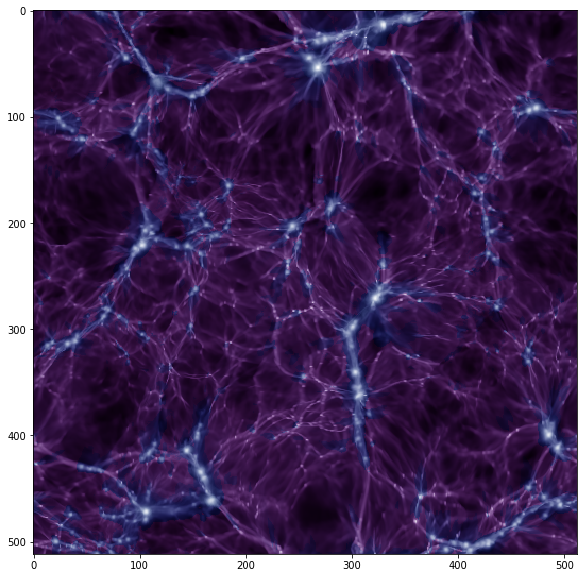

In [16]:
f = plt.figure(figsize=(10,10))
plt.imshow(rgb_image);

## Lastly lets save the figure

In [17]:
plt.imsave("test.png", rgb_image)